# Calibrating the number of iterations ($i_{\max}$) to run GRASP

In [95]:
import pandas as pd
from grasp_iters import read_results, DIRPATH

names = [
    "rat783_522_261_0_p20_a2", # 0
    "rat783_522_261_0_p20_a3",
    "rl1323_882_441_0_p20_a2", # 2
    "rl1323_882_441_0_p20_a3",
    "anpcp_882_441_0_p20_a2",  # 4
    "anpcp_882_441_0_p20_a3",
]
name = names[4]

iters = read_results(name)

iters

,iter,beta,RGD_OF,AFVS_OF,time,is_new_best
0,0,0.791153,4684,3596,3.254879,True
1,1,0.664850,5010,3570,5.784666,True
2,2,0.262222,5362,3536,10.217501,True
3,3,0.144556,4255,3466,14.836207,True
4,4,0.592262,6533,3560,17.833394,False
...,...,...,...,...,...,...
4995,4995,0.210249,4658,3434,16299.392562,False
4996,4996,0.901952,5507,3445,16304.566406,False
4997,4997,0.748335,6230,3697,16306.066841,False
4998,4998,0.402602,4839,3390,16310.343568,False


In [96]:
iters["time"].diff().mean()

3.2630577310061852

In [97]:
def get_improvs(iters_df: pd.DataFrame):
    improvs = iters_df[iters_df["is_new_best"] == True].drop("is_new_best", axis=1)

    # multiplication is negative because the problem is a minimization problem,
    # a decrease in the objective function (a negative percent change) means a better solution
    percents = improvs["AFVS_OF"].pct_change().mul(-100)
    improvs.insert(loc=4, column="imp", value=percents)

    # iterations without improvement (iwi)
    iter_diffs = improvs["iter"].diff().fillna(0).astype(int)
    improvs.insert(loc=6, column="iwi", value=iter_diffs)

    return improvs

In [98]:
improvs = get_improvs(iters)
improvs

,iter,beta,RGD_OF,AFVS_OF,imp,time,iwi
0,0,0.791153,4684,3596,NaN,3.254879,0
1,1,0.664850,5010,3570,0.723026,5.784666,1
2,2,0.262222,5362,3536,0.952381,10.217501,1
3,3,0.144556,4255,3466,1.979638,14.836207,1
5,5,0.461216,4845,3434,0.923254,21.221680,2
14,14,0.283151,4671,3388,1.339546,55.787177,9
39,39,0.679800,5343,3362,0.767414,153.724897,25
73,73,0.704993,5260,3316,1.368233,284.199474,34
516,516,0.841308,5569,3302,0.422195,1787.789857,443
1362,1362,0.273114,4279,3249,1.605088,4595.161348,846


In [99]:
from utils import format_latex_table

format_latex_table(improvs, f"{DIRPATH}\\iters_improvs_{name}.tex");

c:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\anpcp\utils.py:104: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dataframe.to_latex(path, float_format="%.2f", multirow=True)


In [100]:
import matplotlib.pyplot as plt

def plot_improvs(
    iters_df: pd.DataFrame,
    lastimprov: int,
    annotation_xdiff: int,
    annotation_ydiff: int,
    color: str = "blue",
    filename: str = ""
):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=150)
    
    ax.plot(
        iters_df["iter"][:lastimprov],
        iters_df["AFVS_OF"].cummin()[:lastimprov],
        color=color,
    )

    for _, row in improvs.iterrows():
        of = int(row["AFVS_OF"])
        i = int(row["iter"])
        percent = row["imp"]

        ax.annotate(
            f"x(S) = {of}",
            (i, of),
            xytext=(i + annotation_xdiff, of + annotation_ydiff),
        )

    ax.set_title(f"Improvements in $S$ during GRASP")
    ax.set_ylabel("$x(S)$")
    ax.set_xlabel("Iteration")

    if filename:
        fig.savefig(filename, bbox_inches="tight")
    else:
        plt.show()

Manually adjust parameters to plot each instance

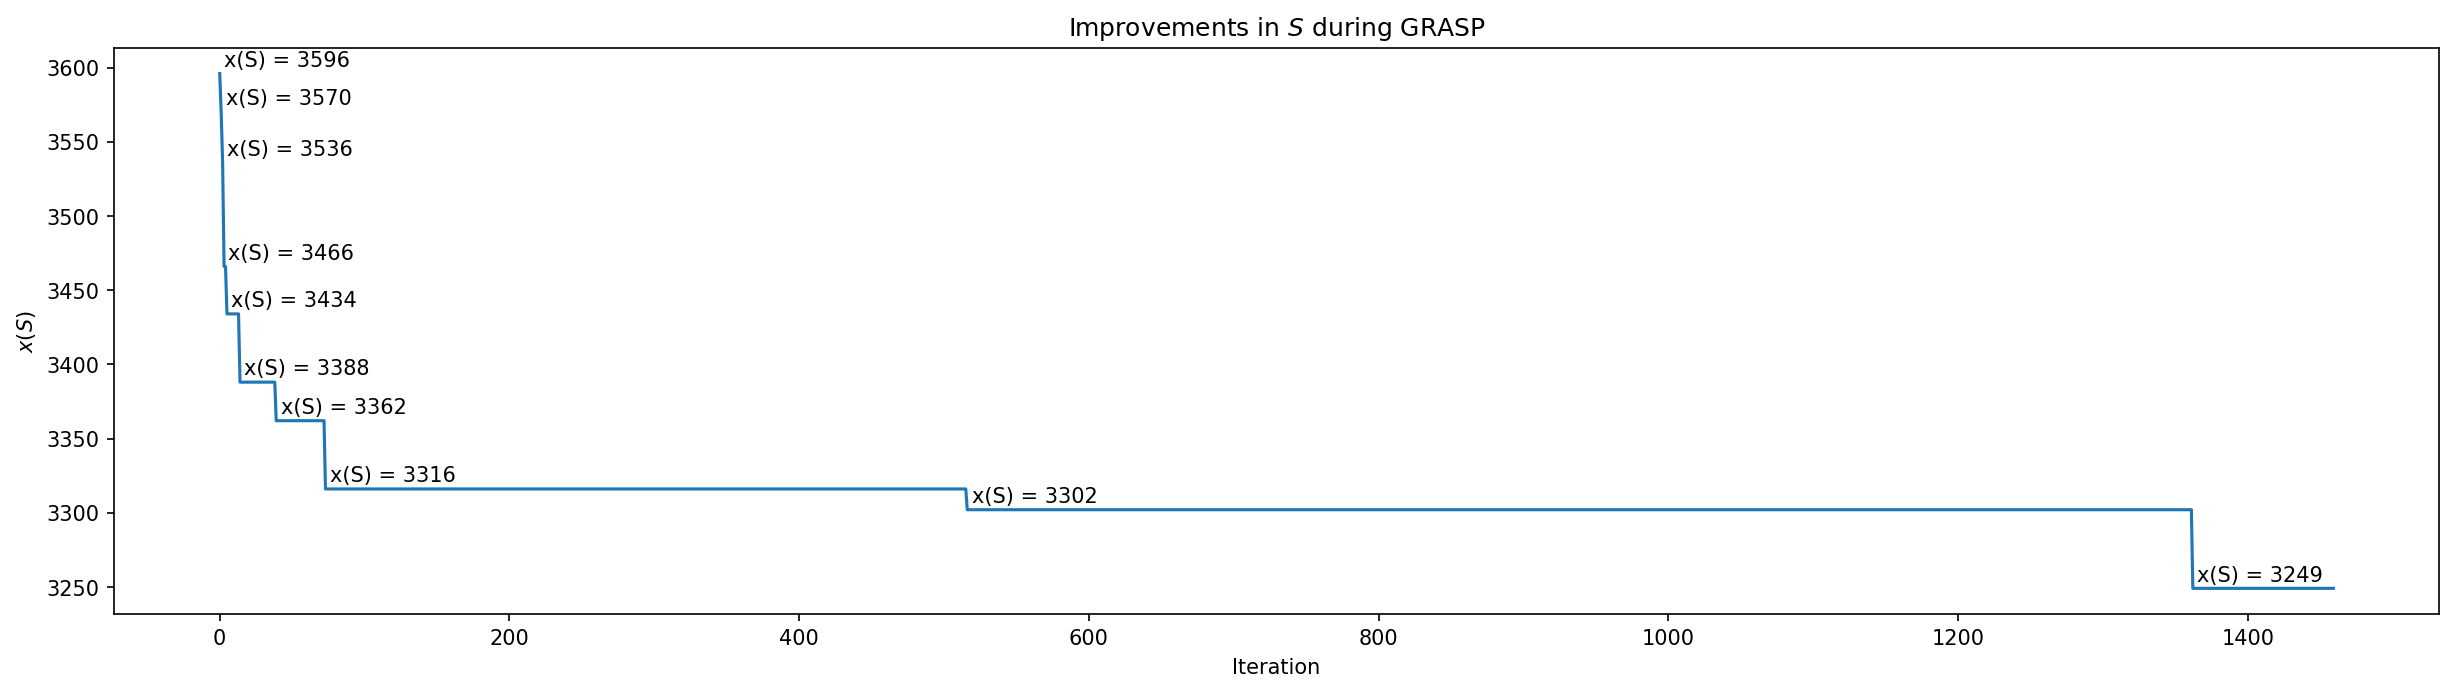

In [109]:
plot_improvs(
    iters, 1460, 3, 5,
    "tab:blue" if name.endswith("2") else "tab:red",
    f"{DIRPATH}\\iters_plot_{name}.png"
)

In [102]:
1362 * 1.1

1498.2